In [63]:
# Import all required libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import binascii
import os


In [64]:
def message_to_binary(message):
    """Convert text message to binary string"""
    return ''.join(format(ord(char), '08b') for char in message)

def binary_to_message(binary):
    """Convert binary string back to text message"""
    return ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary), 8))

def check_capacity(image_path, message):
    """Verify if image can hold the message"""
    img = Image.open(image_path)
    width, height = img.size
    max_bits = width * height * 3  # 3 channels (RGB)
    binary_message = message_to_binary(message)
    required_bits = len(binary_message) + 32  # +32 for length header
    return required_bits <= max_bits

In [65]:
def encode_message(image_path, message, output_path):
    """Hide message in image using LSB steganography"""
    if not check_capacity(image_path, message):
        raise ValueError("Message too long for image")
    
    binary_message = message_to_binary(message)
    message_length = len(binary_message)
    length_header = format(message_length, '032b')
    full_message = length_header + binary_message
    
    img = Image.open(image_path)
    pixels = np.array(img)
    flat_pixels = pixels.flatten()
    
    if len(full_message) > len(flat_pixels):
        raise ValueError("Message too long for image")
    
    for i in range(len(full_message)):
        pixel_value = flat_pixels[i]
        new_pixel_value = (pixel_value & 0xFE) | int(full_message[i])
        flat_pixels[i] = new_pixel_value
    
    encoded_img = Image.fromarray(flat_pixels.reshape(pixels.shape))
    encoded_img.save(output_path)
    return encoded_img

In [66]:
def decode_message(encoded_image_path):
    """Extract hidden message from image"""
    img = Image.open(encoded_image_path)
    pixels = np.array(img)
    flat_pixels = pixels.flatten()
    
    # Extract 32-bit length header
    length_header = ''.join(str(flat_pixels[i] & 1) for i in range(32))
    message_length = int(length_header, 2)
    
    # Extract message bits
    message_bits = ''.join(str(flat_pixels[i] & 1) for i in range(32, 32 + message_length))
    return binary_to_message(message_bits)

In [67]:
def compare_images(original_path, encoded_path):
    """Display original and encoded images side by side"""
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    original_img = Image.open(original_path)
    encoded_img = Image.open(encoded_path)
    
    axes[0].imshow(original_img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(encoded_img)
    axes[1].set_title('Encoded Image')
    axes[1].axis('off')
    
    plt.show()

In [68]:
# ======================
# User Interface
# ======================

def main():
    """Main program interface"""
    print("Image Steganography Tool")
    print("1. Encode message in image")
    print("2. Decode message from image")
    print("3. Exit")
    
    while True:
        choice = input("\nEnter your choice (1/2/3): ").strip()
        
        if choice == '1':
            # Encoding process
            image_path = input("Enter path to original image: ").strip()
            if not os.path.exists(image_path):
                print("Error: Image file not found!")
                continue
                
            message = input("Enter message to hide: ").strip()
            output_path = input("Enter path to save encoded image: ").strip()
            
            try:
                encoded_img = encode_message(image_path, message, output_path)
                print("\nMessage successfully encoded!")
                compare_images(image_path, output_path)
            except Exception as e:
                print(f"Error: {str(e)}")
                
        elif choice == '2':
            # Decoding process
            encoded_path = input("Enter path to encoded image: ").strip()
            if not os.path.exists(encoded_path):
                print("Error: Image file not found!")
                continue
                
            try:
                message = decode_message(encoded_path)
                print("\nDecoded Message:")
                print(message)
                display(Image.open(encoded_path))
            except Exception as e:
                print(f"Error decoding: {str(e)}")
                
        elif choice == '3':
            print("Exiting program...")
            break
            
        else:
            print("Invalid choice. Please enter 1, 2, or 3.")


Image Steganography Tool
1. Encode message in image
2. Decode message from image
3. Exit



Enter your choice (1/2/3):  1
Enter path to original image:  C:\Users\ADMIN\Steganography
Enter message to hide:  Hello this is edunet
Enter path to save encoded image:  C:\Users\ADMIN\Steganography


Error: [Errno 13] Permission denied: 'C:\\Users\\ADMIN\\Steganography'



Enter your choice (1/2/3):  1
Enter path to original image:  C:\Users\ADMIN\Steganography\sample.png
Enter message to hide:  This is edunet
Enter path to save encoded image:  C:\Users\ADMIN\Steganography\output.png



Message successfully encoded!


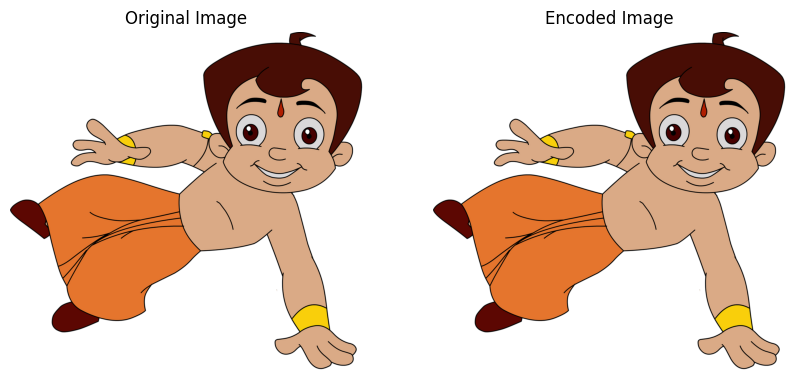

In [ ]:
# ======================
# Program Execution
# ======================

if __name__ == "__main__":
    main()